In [1]:
import numpy as np

# Sentinel_1_GRD

## Define Area Extents  

In [2]:
from datetime import datetime
# That I can sqap areas
vietnam_extent = dict(
    lat  = (10.9348, 11.0190),
    lon  = (107.8164, 107.9168),
    time = (datetime(2015,1,1), datetime(2017,1,1)),
)

menindee_extent = dict(
    lat = ( -32.420,-32.272),
    lon = (142.2348, 142.407),
)

extent = menindee_extent

A quick visualization of the area before it is loaded through the datacube 

In [3]:
from utils.data_cube_utilities.dc_display_map import display_map

display_map(latitude  = extent['lat'],
            longitude = extent['lon'])  

# Display Available Products. Pick a product to load. 
The following code loads a datacube object. Loads a list of available products, and filters in favor of products containing the word `s1`. 

In [4]:
import datacube
dc = datacube.Datacube(config = "/home/localuser/.datacube.conf")

products = dc.list_products()
products[products['name'].str.contains("s1")]  

name  \
id                             
57        s1_gamma0_colombia   
58       s1_gamma0_lake_chad   
59  s1_gamma0_menindee_lakes   
10           s1_gamma0_scene   
60         s1_gamma0_vietnam   

                                          description    platform  orbit  \
id                                                                         
57  Sentinel-1A/B SAR Gamma0, processed to the CEO...  SENTINEL_1    NaN   
58  Sentinel-1A/B SAR Gamma0, processed to the CEO...  SENTINEL_1    NaN   
59  Sentinel-1A/B SAR Gamma0, processed to the CEO...  SENTINEL_1    NaN   
10  Sentinel-1A/B SAR Gamma0 scenes, processed to ...  SENTINEL_1    NaN   
60  Sentinel-1A/B SAR Gamma0, processed to the CEO...  SENTINEL_1    NaN   

   instrument  time  format  gsi product_type  lon  sat_path  sat_row  lat  \
id                                                                           
57        SAR  None  NetCDF  NaN       gamma0  NaN       NaN      NaN  NaN   
58        SAR  None  NetCDF  NaN       gamma0  NaN       NaN      NaN  NaN   
59        SAR  None  NetCDF  NaN       gamma0  NaN       NaN      NaN  NaN   
10        SAR  None    ENVI  NaN       gamma0  NaN       NaN      NaN  NaN   
60        SAR  None  NetCDF  NaN       gamma0  NaN       NaN      NaN  NaN   

          crs                         resolution                   tile_size  \
id                                                                             
57  EPSG:4326  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
58  EPSG:4326  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
59  EPSG:4326  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   
10        NaN                                NaN                         NaN   
60  EPSG:4326  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   

       spatial_dimensions  
id                         
57  (latitude, longitude)  
58  (latitude, longitude)  
59  (latitude, longitude)  
10                    NaN  
60  (latitude, longitude)

# Define a product and platform 

In [5]:
menindee_extent["product"]  = "s1_gamma0_menindee_lakes"
menindee_extent["platform"] = "SENTINEL_1"

vietnam_extent["product"]   = "s1_gamma0_vietnam"
vietnam_extent["platform"]  = "SENTINEL_1"

# View basic metadata about this product

In [6]:
from utils.data_cube_utilities.data_access_api import DataAccessApi
dca = DataAccessApi(config = '/home/localuser/.datacube.conf')

dca.get_datacube_metadata(platform = extent["platform"],
                         product  = extent["product"])

{'lat_extents': (-33.174948936, -31.556389028968),
 'lon_extents': (141.6003918, 143.21868199200003),
 'pixel_count': 36006000,
 'tile_count': 58,
 'time_extents': (datetime.datetime(2016, 2, 15, 19, 48, 13, 448000),
  datetime.datetime(2016, 12, 23, 19, 48, 19, 587000))}

In [7]:
product_details = dc.list_products()[dc.list_products().name ==extent["product"]]
product_details

name  \
id                             
59  s1_gamma0_menindee_lakes   

                                          description    platform  orbit  \
id                                                                         
59  Sentinel-1A/B SAR Gamma0, processed to the CEO...  SENTINEL_1    NaN   

   instrument  time  format  gsi product_type  lon  sat_path  sat_row  lat  \
id                                                                           
59        SAR  None  NetCDF  NaN       gamma0  NaN       NaN      NaN  NaN   

          crs                         resolution                   tile_size  \
id                                                                             
59  EPSG:4326  [-0.000269715032, 0.000269715032]  [0.809145096, 0.809145096]   

       spatial_dimensions  
id                         
59  (latitude, longitude)

# Load Data  


In [20]:
import datacube
dc = datacube.Datacube(config = "/home/localuser/.datacube.conf")

dataset = dc.load(**extent)

In [21]:
dataset

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639, time: 54)
Coordinates:
  * time       (time) datetime64[ns] 2016-02-15T19:48:13.448436 ...
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
    vv         (time, latitude, longitude) float32 0.0 0.0 0.0 0.0 0.0 0.0 ...
Attributes:
    crs:      EPSG:4326

# View an acquisition in dataset

In [22]:
first_slice = dataset.isel(time = 1) # iselect selects by index, rather than value.

In [23]:
first_slice

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
    time       datetime64[ns] 2016-02-27T19:47:48.429262
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (latitude, longitude) float32 0.0029166227 0.0076360526 ...
    vv         (latitude, longitude) float32 0.02037373 0.013546002 ...
Attributes:
    crs:      EPSG:4326

> Helper function for plotting

In [24]:
def figure_ratio(ds, fixed_width = 20):
    width = fixed_width
    height = len(ds.latitude) * (fixed_width / len(ds.longitude))
    return (width, height)

### plot vh
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

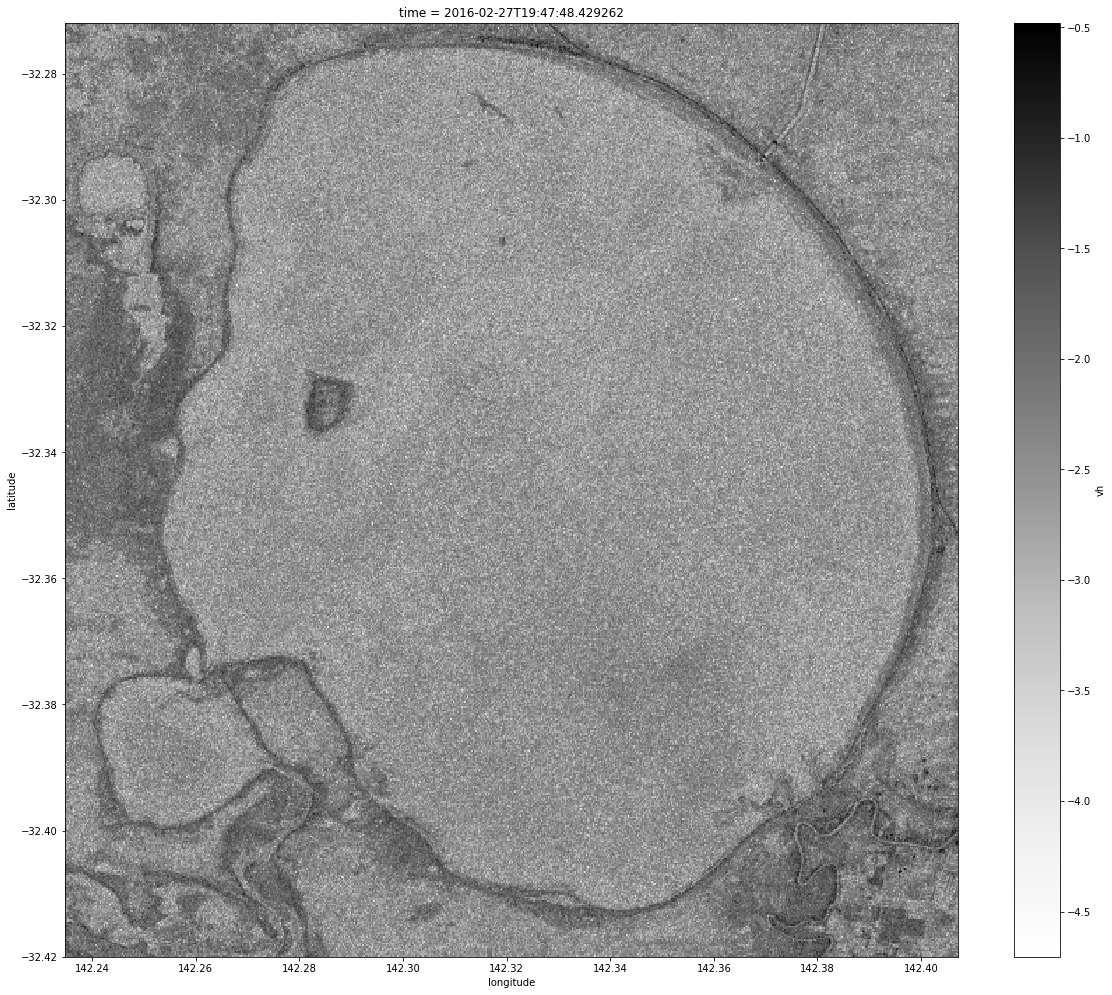

In [25]:
%matplotlib inline
np.log10(first_slice.vh).plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot vv
A few outliers might distort the output. The following code will plot `vh` bands on a logarithmic scale

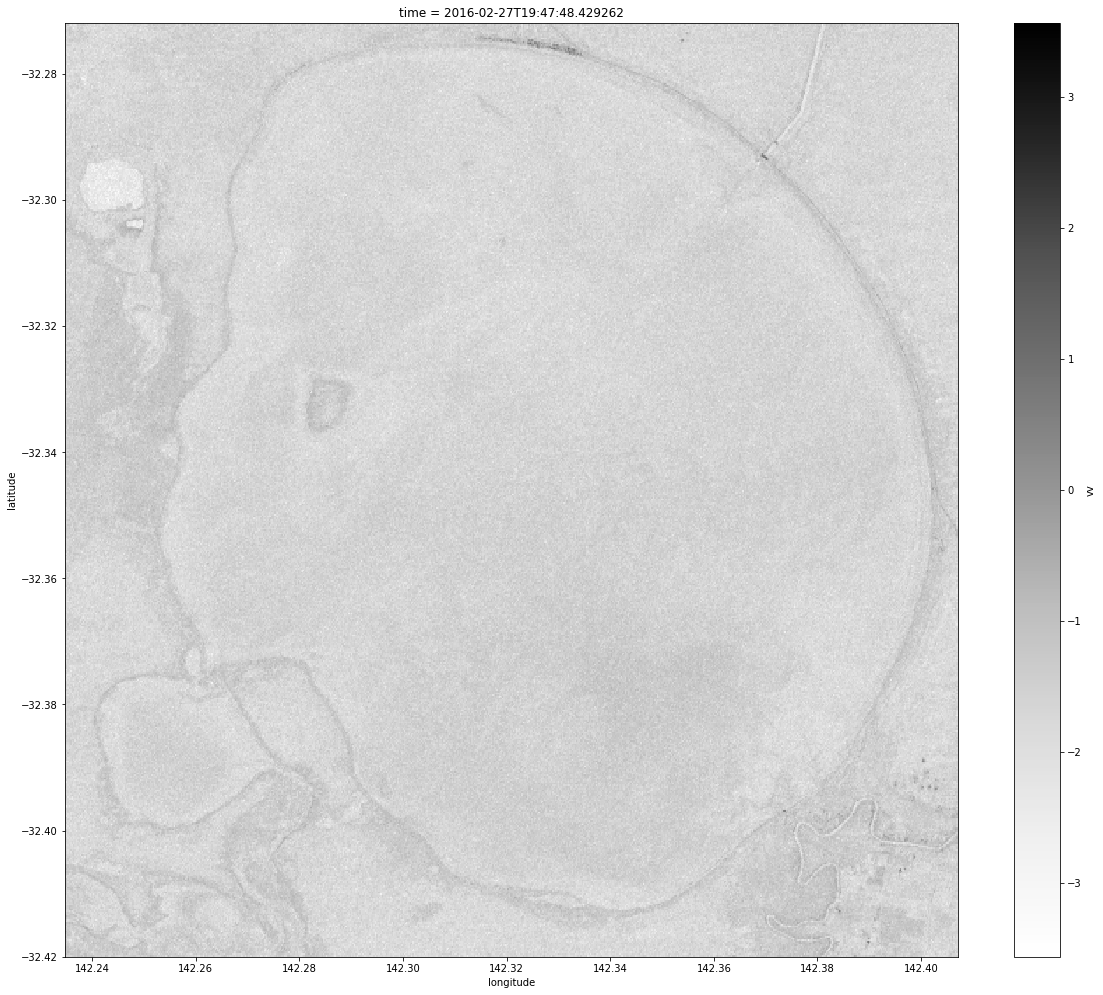

In [26]:
np.log10(first_slice.vv).plot(cmap = "Greys",figsize = figure_ratio(first_slice))

### plot vv/vh

#### Define ratio function
This is a very simple function. It's defined in this notebook just to show how how arithmetic operations scale on an xarray datasets and how to add/augment a dataset with synthetic variables
<br>  
$$ dataset_{a\_per\_b} = \frac{dataset_a}{dataset_b} $$  
  
<br>

In [27]:
import xarray as xr 
def augment_dataset_with_ratio(ds: xr.Dataset, band_name_1: str, band_name_2 :str) -> xr.Dataset:
    a_per_b = (ds[band_name_1]/ds[band_name_2])
    a_per_b = a_per_b.to_dataset(name = '{b1}_per_{b2}'.format(b1 = band_name_1, b2 = band_name_2)) # turn xarray.dataarray into xarray dataset and name dataset variable.
    return ds.merge(a_per_b)

<br> 
<br> 

Apply function and display new `xarray.Dataset`  
<br> 


In [28]:
first_slice = augment_dataset_with_ratio(first_slice, "vv", "vh")
first_slice = augment_dataset_with_ratio(first_slice, "vh", "vv")

print(first_slice)

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
    time       datetime64[ns] 2016-02-27T19:47:48.429262
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vh         (latitude, longitude) float32 0.0029166227 0.0076360526 ...
    vv         (latitude, longitude) float32 0.02037373 0.013546002 ...
    vv_per_vh  (latitude, longitude) float32 6.985384 1.7739534 4.618044 ...
    vh_per_vv  (latitude, longitude) float32 0.14315605 0.56371266 ...
Attributes:
    crs:      EPSG:4326


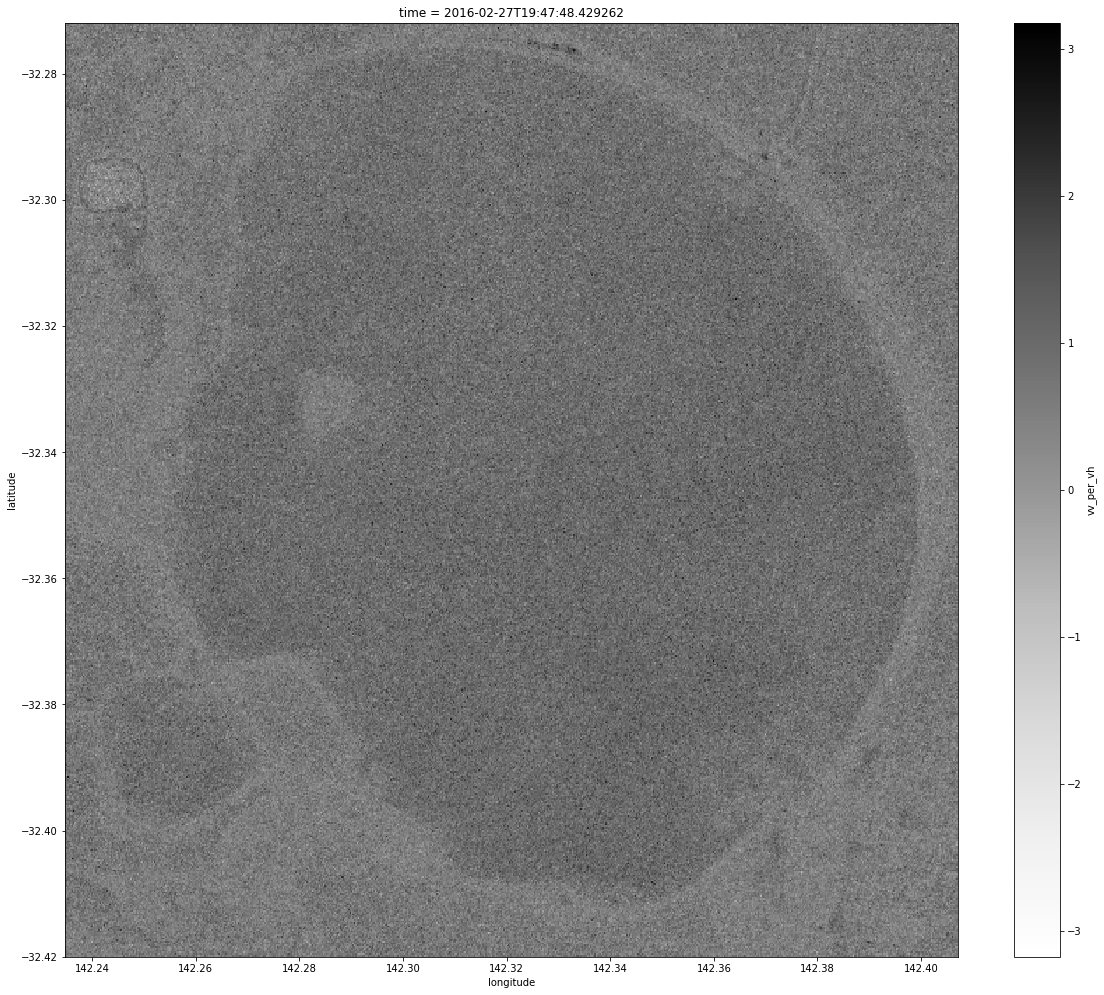

In [29]:
np.log10(first_slice.vv_per_vh).plot(cmap = "Greys", figsize = figure_ratio(first_slice))

### plot false color

The function below defines a basic normalization and plotting function for xarrays. I would not recommend re-using this unless you understand your data in great enough detail to determine that this suites your needs. This is a first pass at including a plotting utility in our S1 analysis workflow. The canonical approach or desired results would be something along the lines of following established processing methods used in something like ESA's [Sentinel-1 Toolbox](http://seom.esa.int/landtraining2015/files/Day_5/D5P1a_LTC2015_Foumelis.pdf) or from the [Sentinel Callibration Guide](https://sentinel.esa.int/documents/247904/685163/S1-Radiometric-Calibration-V1.0.pdf).

In [33]:
import numpy as np
import xarray as xr

def build_rgb_from_ds(_dataset: xr.Dataset,
                      r:str = None,
                      g:str = None,
                      b:str = None, 
                      logarithmic_scale_enabled = False):
    
    norm = _dataset.copy()

    if logarithmic_scale_enabled == True:
        norm[r] = np.log10(norm[r]) 
        norm[g] = np.log10(norm[g]) 
        norm[b] = np.log10(norm[b]) 

    norm = (255 * _dataset/_dataset.max()).astype(np.uint16)
    
    _r = norm[r].values #.astype(np.float32)
    _g = norm[g].values #.astype(np.float32)
    _b = norm[b].values #_per_vh.astype(np.float32)
    _rgb = np.dstack([_r,_g,_b])
    return _rgb

In [34]:
rgb = build_rgb_from_ds(first_slice,
                        r = "vv", 
                        g = "vh",
                        b = "vv_per_vh")

<br>

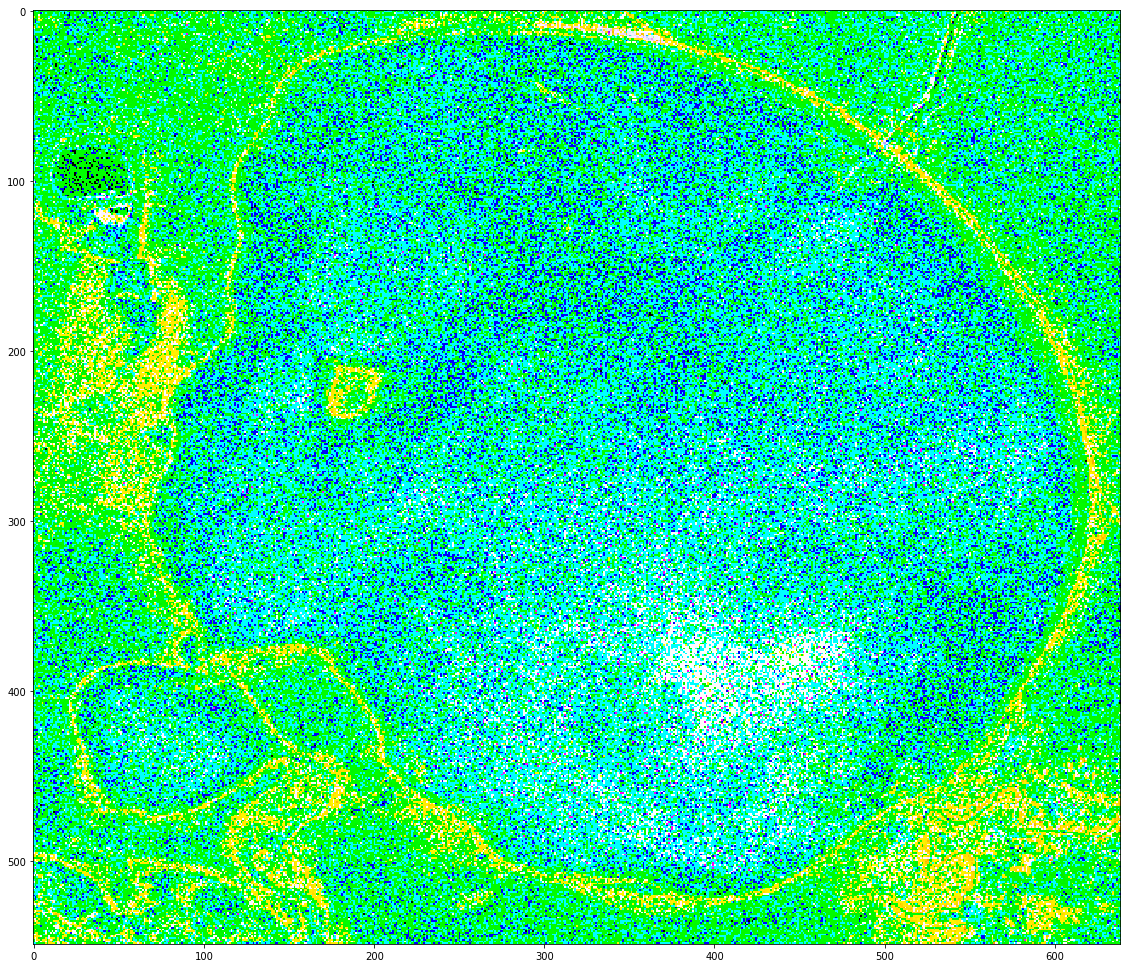

In [35]:
import matplotlib.pyplot as plt
plt.figure( figsize = figure_ratio(first_slice))
plt.imshow( rgb )

<br>  
# Build a median value composite(mosaic) for your time series 

The following section gets messy. We build a mosaic peice by peice, rather than all at once. This employs a chunking processes whereby small extents are queried and processed.  

In [40]:
from utils.data_cube_utilities.dc_chunker import create_geographic_chunks, combine_geographic_chunks

geographic_chunks = create_geographic_chunks(latitude=extent["lat"], longitude=extent["lon"], geographic_chunk_size=.05)

<br>

In [41]:
for x in geographic_chunks:
    print(x)

{'latitude': (-32.42, -32.272), 'longitude': (142.2348, 142.407)}


<br>  

In [42]:
from utils.data_cube_utilities.dc_mosaic import create_median_mosaic
from utils.data_cube_utilities.dc_sar_utils import dn_to_db 
import warnings
warnings.filterwarnings("ignore")

import numpy as np  

measurements = ['vv', 'vh']
product_chunks = []

# This part is unpythonic but explicit
for index, chunk in enumerate(geographic_chunks):
    data = dca.get_dataset_by_extent(extent["product"], 
                                    longitude=chunk['longitude'], latitude=chunk['latitude'], 
                                    measurements=measurements)
    if 'vv' in data:
        product_chunks.append(create_median_mosaic(data, clean_mask=np.full((data.vv.shape), True), dtype="float32", no_data=0))
        

final_mosaic = combine_geographic_chunks(product_chunks)


In [43]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vv         (latitude, longitude) float32 0.020685723 0.018773835 ...
    vh         (latitude, longitude) float32 0.0031422344 0.0036802033 ...

In [44]:
final_mosaic = augment_dataset_with_ratio(final_mosaic, "vv", "vh")
final_mosaic = augment_dataset_with_ratio(final_mosaic, "vh", "vv")

In [45]:
final_mosaic

<xarray.Dataset>
Dimensions:    (latitude: 549, longitude: 639)
Coordinates:
  * latitude   (latitude) float64 -32.27 -32.27 -32.27 -32.27 -32.27 -32.27 ...
  * longitude  (longitude) float64 142.2 142.2 142.2 142.2 142.2 142.2 142.2 ...
Data variables:
    vv         (latitude, longitude) float32 0.020685723 0.018773835 ...
    vh         (latitude, longitude) float32 0.0031422344 0.0036802033 ...
    vv_per_vh  (latitude, longitude) float32 6.5831256 5.1013036 7.35876 ...
    vh_per_vv  (latitude, longitude) float32 0.15190354 0.19602832 ...

### Plot Median Composite

In [46]:
rgb = build_rgb_from_ds(final_mosaic,
                        r = "vv", 
                        g = "vh",
                        b = "vh_per_vv")

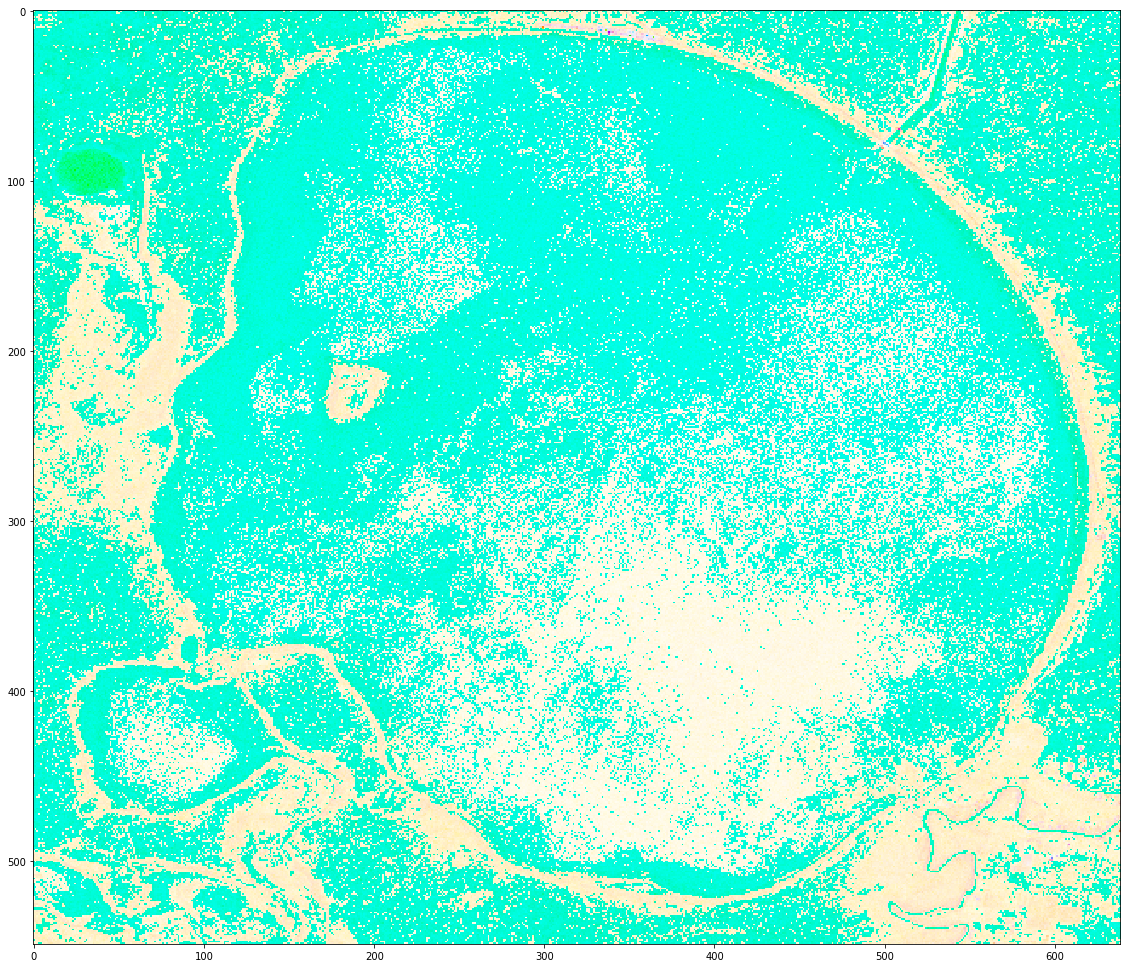

In [47]:
import matplotlib.pyplot as plt
plt.figure( figsize = figure_ratio(final_mosaic))
plt.imshow( rgb )

# Pixel Drill Analysis


In [48]:
dataset = augment_dataset_with_ratio(dataset, "vv", "vh") ## Compute VV/VH for entire dataset rather than just a slice(see section above)


### Chose a pixel  
Choose a pixel  from the bounded box below (A click will reveal lat and lon coordinates)     
<br> 

In [49]:
display_map(latitude  = extent['lat'], longitude = extent['lon'])  

In [50]:
# Lat and Lon coordinates extracted from the map above 
pixel_lat = -32.3626 #Menindee
pixel_lon = 142.2764 #Menindee

pixel_lat = 11.1306
pixel_lon = 107.6052

Select a pixel from our `xarray.Dataset` using nearest neighbor.  

In [51]:
pixel = dataset.sel(latitude  = pixel_lat,
                    longitude = pixel_lon,
                    method = 'nearest') # nearest neighbor selection  

<br> 

In [52]:
pixel

<xarray.Dataset>
Dimensions:    (time: 54)
Coordinates:
  * time       (time) datetime64[ns] 2016-02-15T19:48:13.448436 ...
    latitude   float64 -32.27
    longitude  float64 142.2
Data variables:
    vh         (time) float32 0.0 0.0029166227 0.0 0.0030927174 0.0 ...
    vv         (time) float32 0.0 0.02037373 0.0 0.01737503 0.0 0.009890656 ...
    vv_per_vh  (time) float32 nan 6.985384 nan 5.6180463 nan 3.8226945 nan ...
Attributes:
    crs:      EPSG:4326

<br> 

### Distributions( pixel histogram per band)  

#### VH

(array([29.,  5.,  8.,  2.,  1.,  3.,  1.,  1.,  2.,  2.]),
 array([0.        , 0.00106547, 0.00213094, 0.00319641, 0.00426188,
        0.00532735, 0.00639282, 0.00745829, 0.00852375, 0.00958922,
        0.01065469]),
 <a list of 10 Patch objects>)

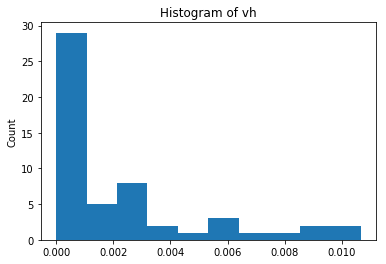

In [53]:
pixel.vh.plot.hist()

#### VV

(array([29.,  6.,  9.,  3.,  2.,  2.,  0.,  1.,  1.,  1.]),
 array([0.        , 0.00788493, 0.01576985, 0.02365478, 0.03153971,
        0.03942463, 0.04730956, 0.05519448, 0.06307941, 0.07096434,
        0.07884926]),
 <a list of 10 Patch objects>)

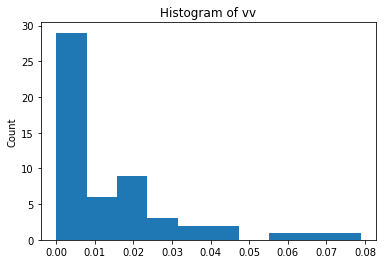

In [54]:
pixel.vv.plot.hist()

### Plot Pixel Bands

### VH

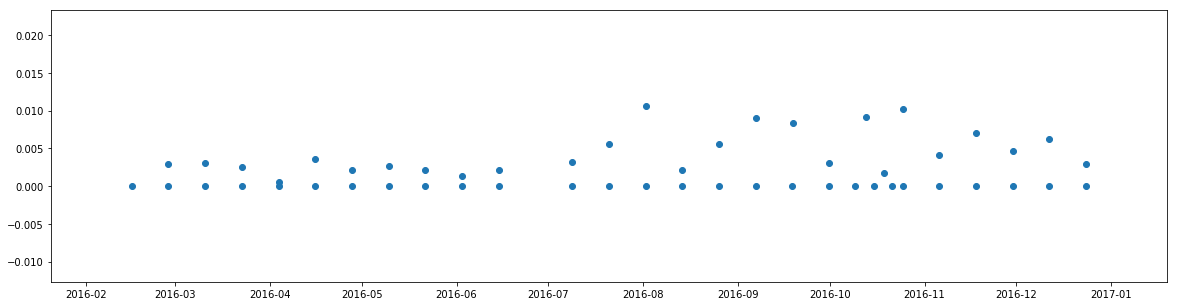

In [55]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values, pixel.vh.values)

### Log10(VH)

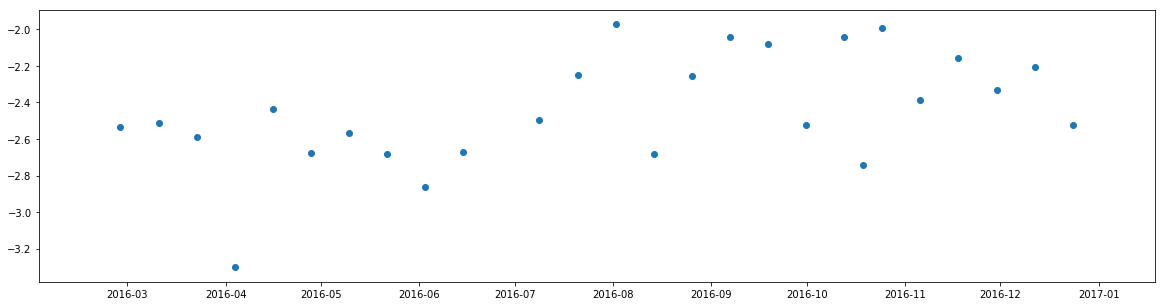

In [56]:
## X-axis time, Y-axis values of vh
plt.figure(figsize = (20,5)) 
plt.scatter(pixel.time.values,  np.log10(pixel.vh.values))

### VV

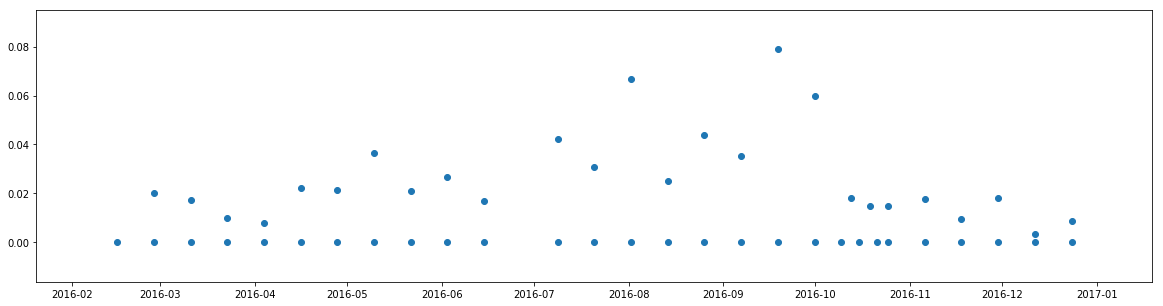

In [57]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  pixel.vv.values)

### Log10(VV) 

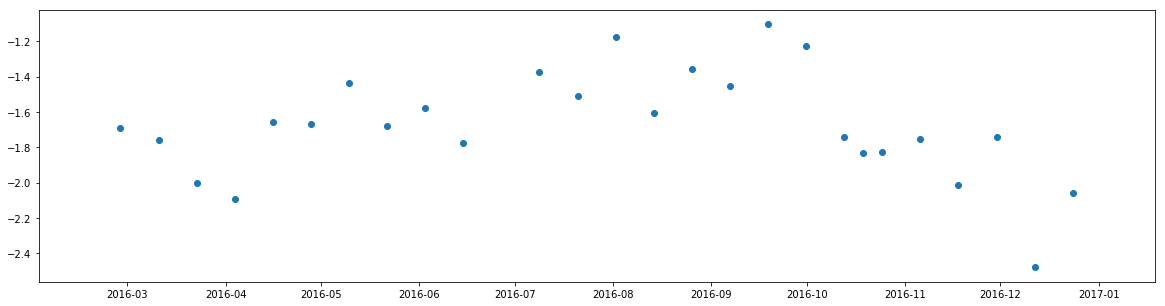

In [58]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,  np.log10(pixel.vv.values))

### VV/VH

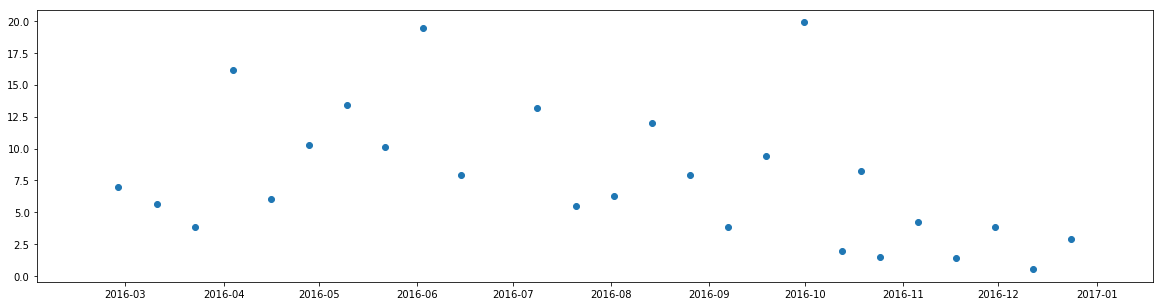

In [59]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values, pixel.vv_per_vh.values)

### Log10(VV) / Log10(VH)  

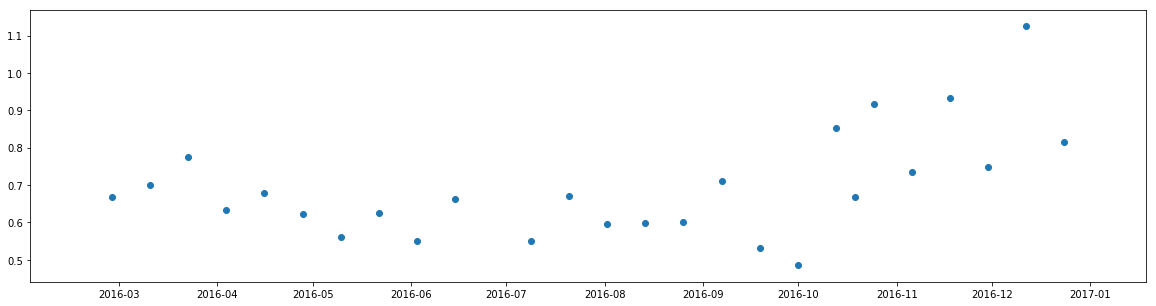

In [60]:
## X-axis time, Y-axis values of vv
plt.figure(figsize = (20,5))
plt.scatter(pixel.time.values,
            (np.log10(pixel.vv) / np.log10(pixel.vh)).values
           )

<br>  
<br>  
# Box and Whisker Plot for the Loaded Dataset

In [62]:
def ds_to_timeseries(ds, band, log = False):
    da = ds[band]
    da = np.log10(da) if log == True else da
    da_by_time_slices = [da.isel(time = i) for i in range(len(da.time))]
    return [x.values[np.isfinite(x.values)].flatten() for x in da_by_time_slices]    

### VV

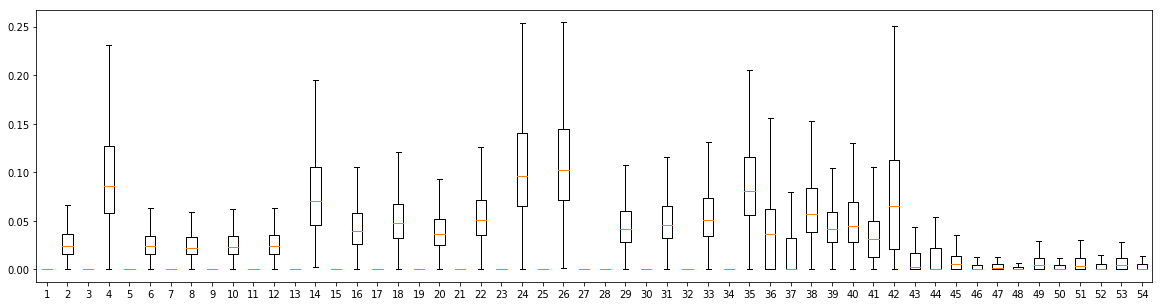

In [63]:
plt.figure(figsize = (20,5))

plt.boxplot(ds_to_timeseries(dataset, "vv"), 0, "");


### VH

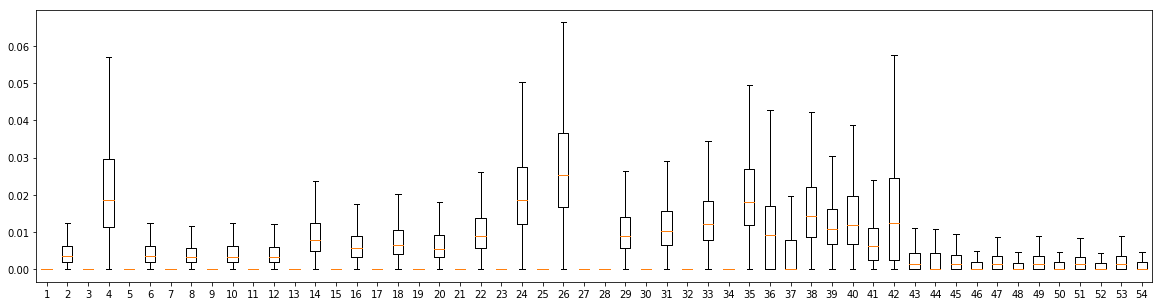

In [64]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "vh"), 0, "");

### VV/VH

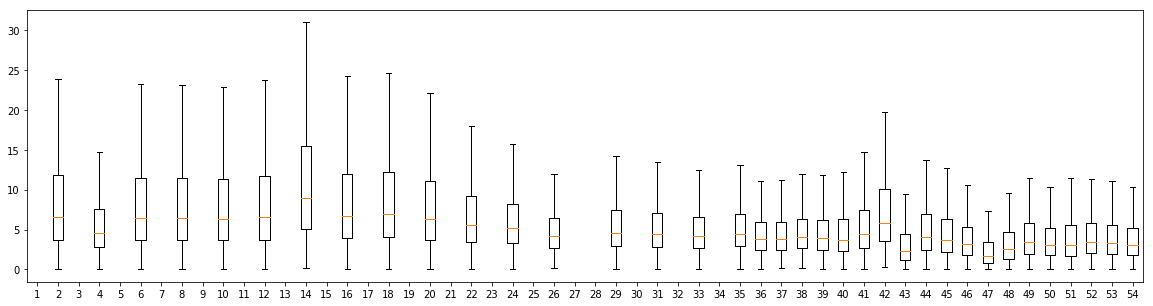

In [65]:
plt.figure(figsize = (20,5))
plt.boxplot(ds_to_timeseries(dataset, "vv_per_vh"), 0, "");

## Apply threshold to data  

In [66]:
import matplotlib
def plot_threshold(ds, band_name, bottom = None , top = None, log_scaled = False, cmap_name = 'Greys'):
    # Threshold is applied to original data, not log scaled data(if you haven't scaled already)
    _range = "Full {} range: {}-{}".format(band_name, ds[band_name].min().values,ds[band_name].max().values )
    
    def figure_ratio(ds, fixed_width = 20):
        width = fixed_width
        height = len(ds.latitude) * (fixed_width / len(ds.longitude))
        return (width, height)
    
    selection = ds[band_name]
    
    my_cmap = matplotlib.cm.get_cmap(cmap_name)
    my_cmap.set_over('r')
    my_cmap.set_under('b')

    plt.figure(figsize = figure_ratio(ds))
    
    selection = np.log10(selection) if log_scaled == True else selection
    
    bottom    = np.log10(bottom)    if log_scaled == True and bottom is not None else bottom
    top       = np.log10(top)       if log_scaled == True and top is not None else top
    
    selection.plot(cmap = my_cmap, vmax =top, vmin = bottom)    
    plt.figtext(0.7,0,_range, horizontalalignment = "center")

### VV(no threshold)

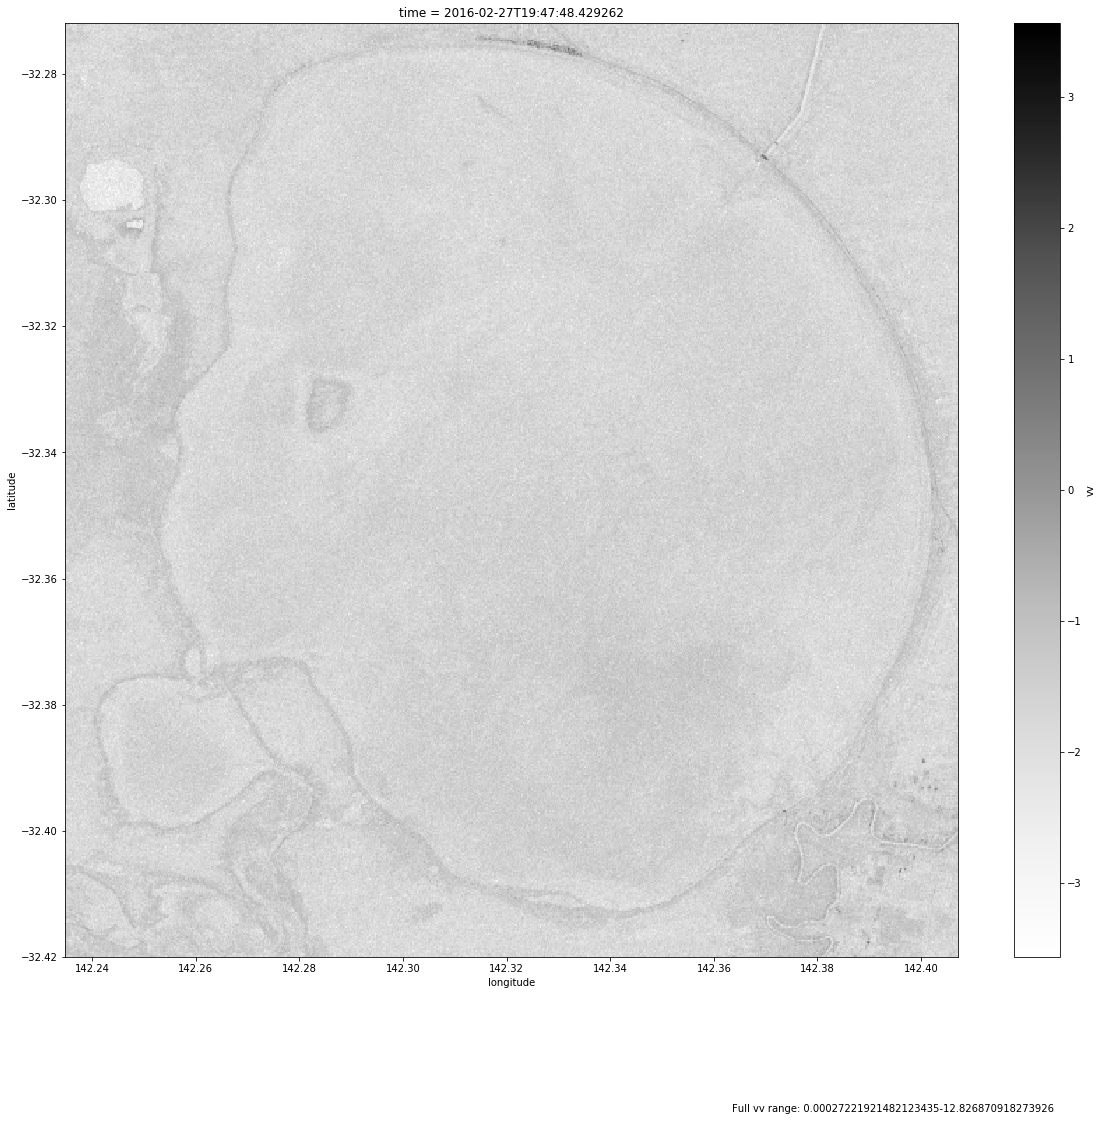

In [67]:
plot_threshold(first_slice, "vv", log_scaled = True)

### VV(threshold) 

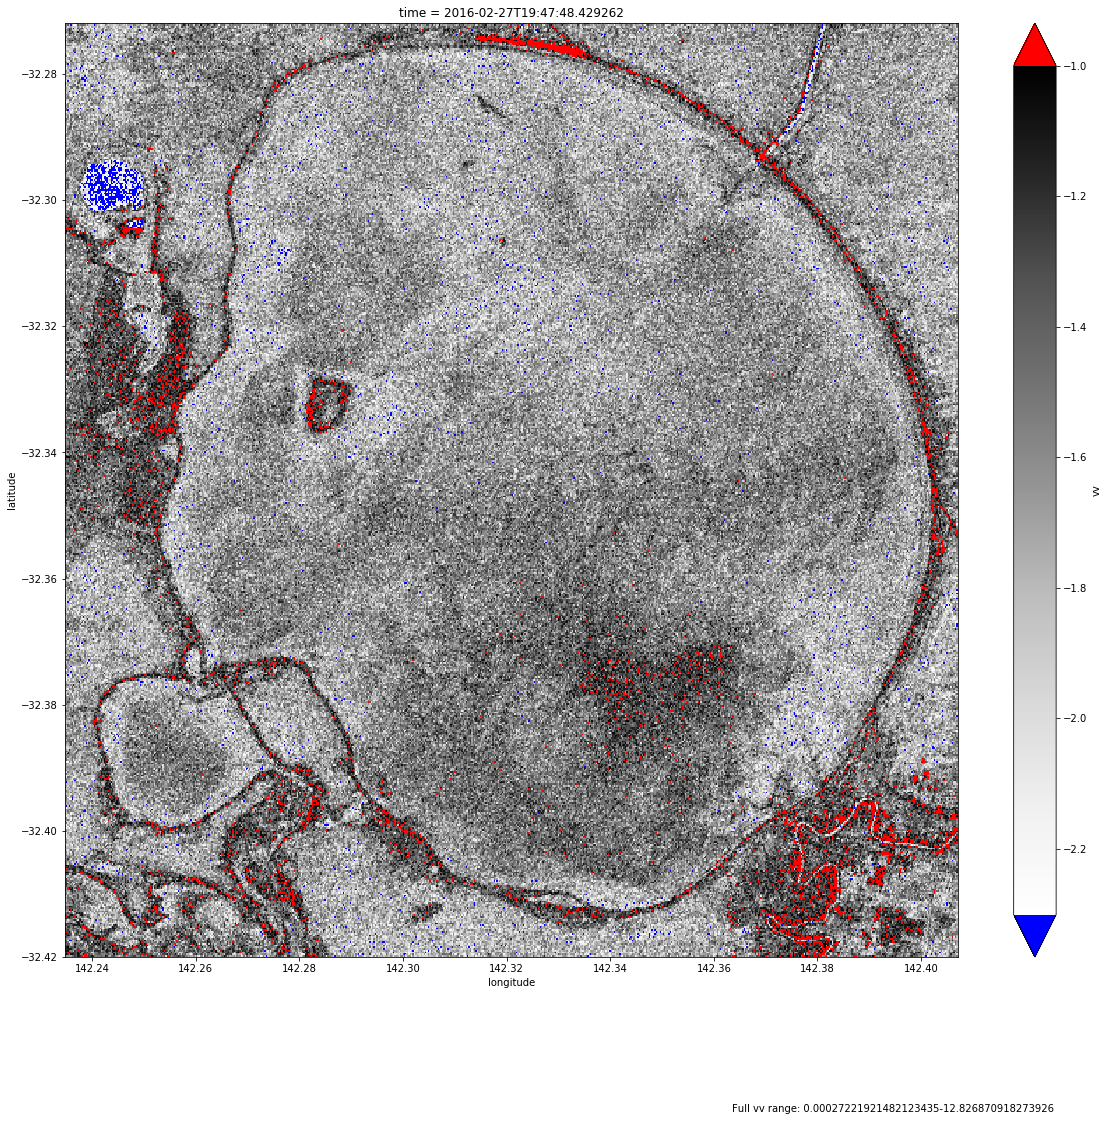

In [68]:
plot_threshold(first_slice, "vv",
               bottom = 0.005, 
               top = .1, 
               log_scaled = True)

### VH( no threshold ) 

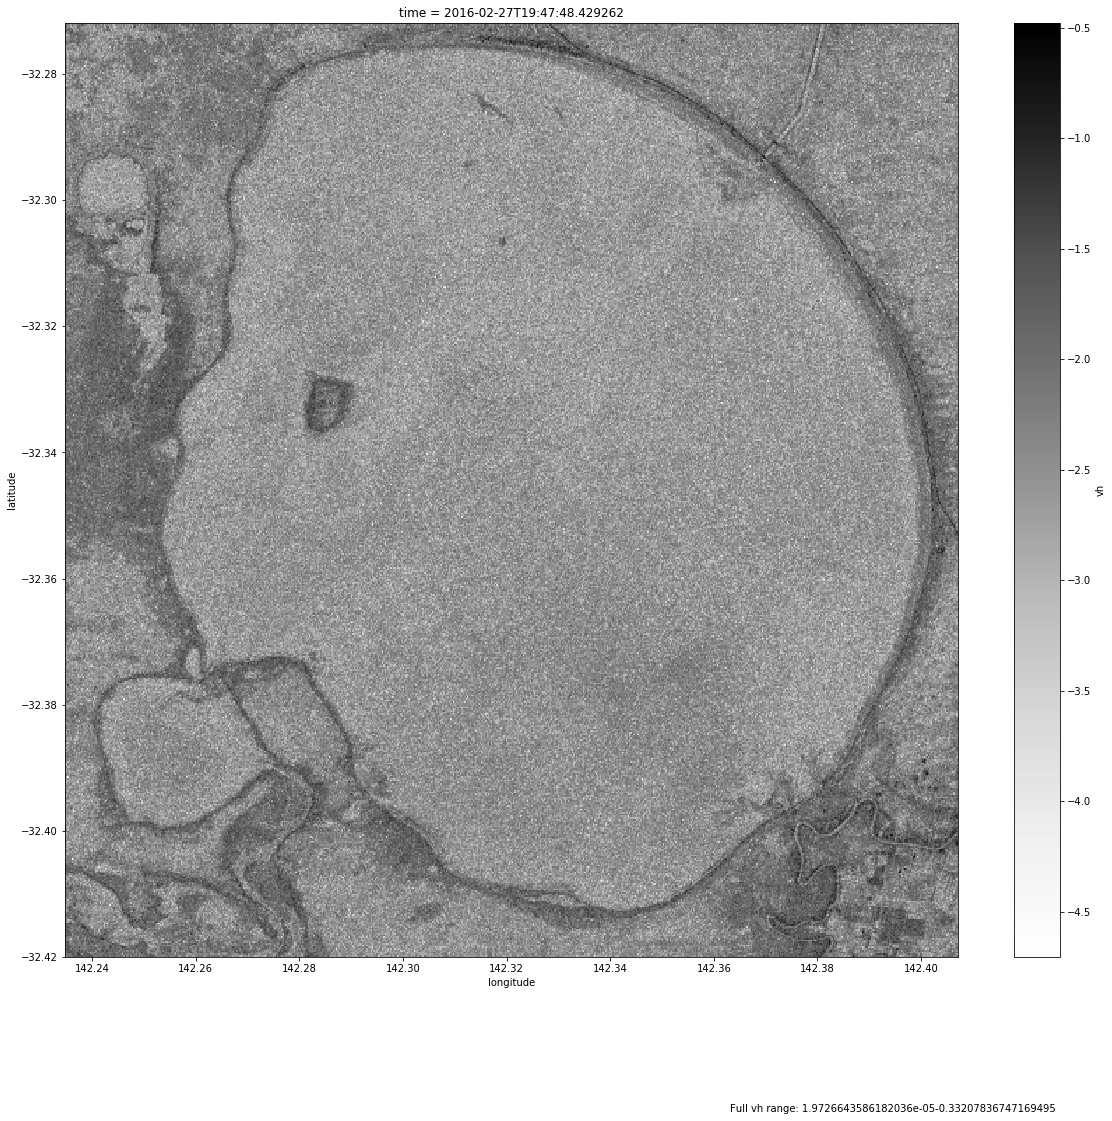

In [69]:
plot_threshold(first_slice, "vh", log_scaled = True)

### VV(threshold) 

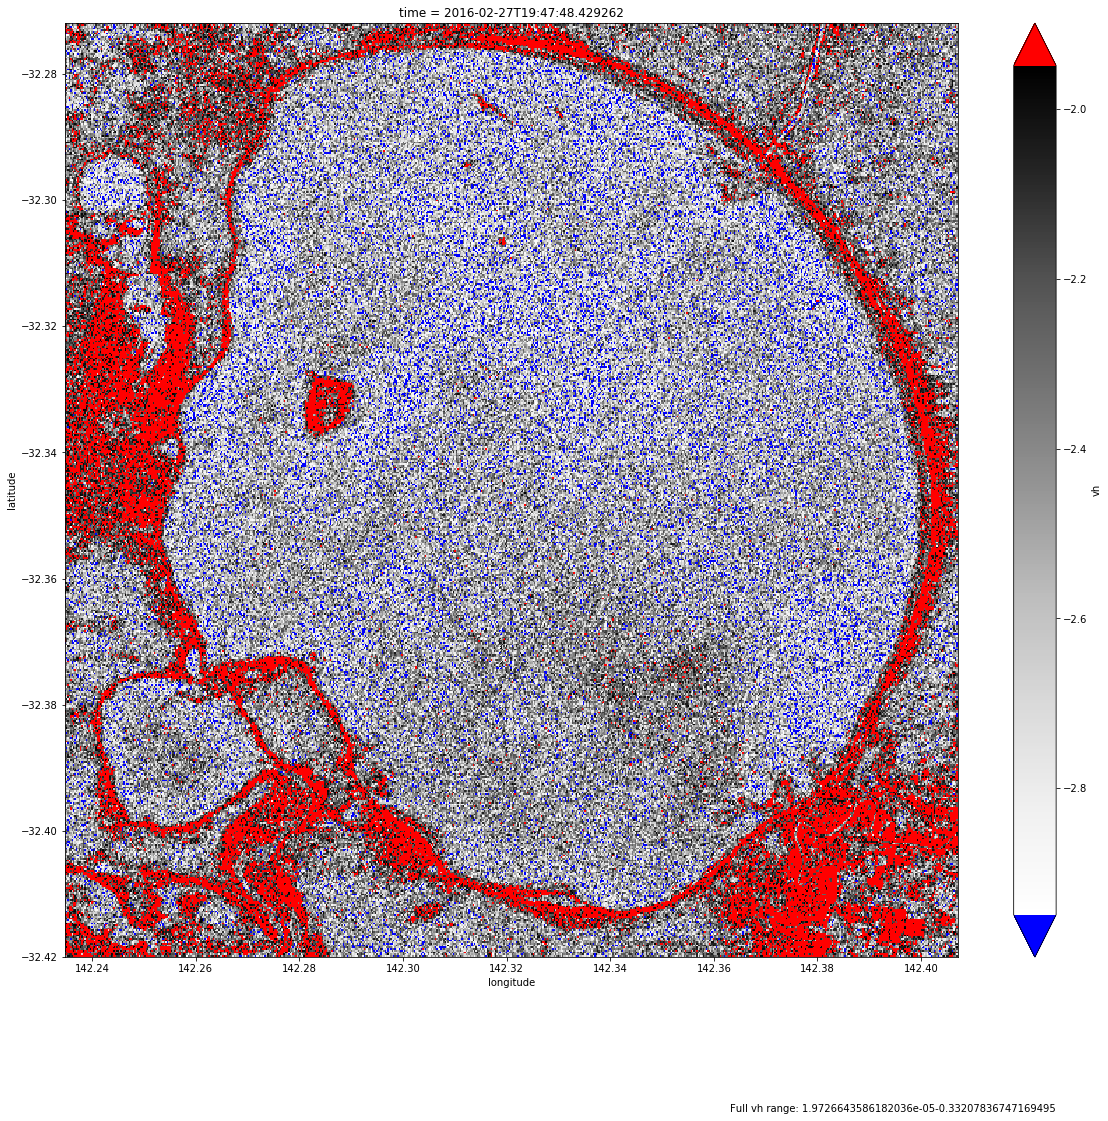

In [70]:
plot_threshold(first_slice,
               "vh",
               log_scaled = True,
               bottom = 0.001125,
               top = 0.01125
               )